# Relative Strength Index (RSI)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.momentum import RSIIndicator

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations¶

In [3]:
def variations(windows:list[int]):
    """
    returns variations of atr indicator with given windows
    """
    name = "rsi_"
    for w in windows:

        i = RSIIndicator(df.close, w)
        sma_name = name + str(w)
        df[sma_name] = i.rsi()
#         df[sma_name + "_log"] = list(map(lambda x: uf.log_abs(x*100, zeros=True), i.rsi()))


In [4]:
variations([5, 10, 15, 20, 25, 30, 50, 100, 200, 500, 1000])
# variations([50])

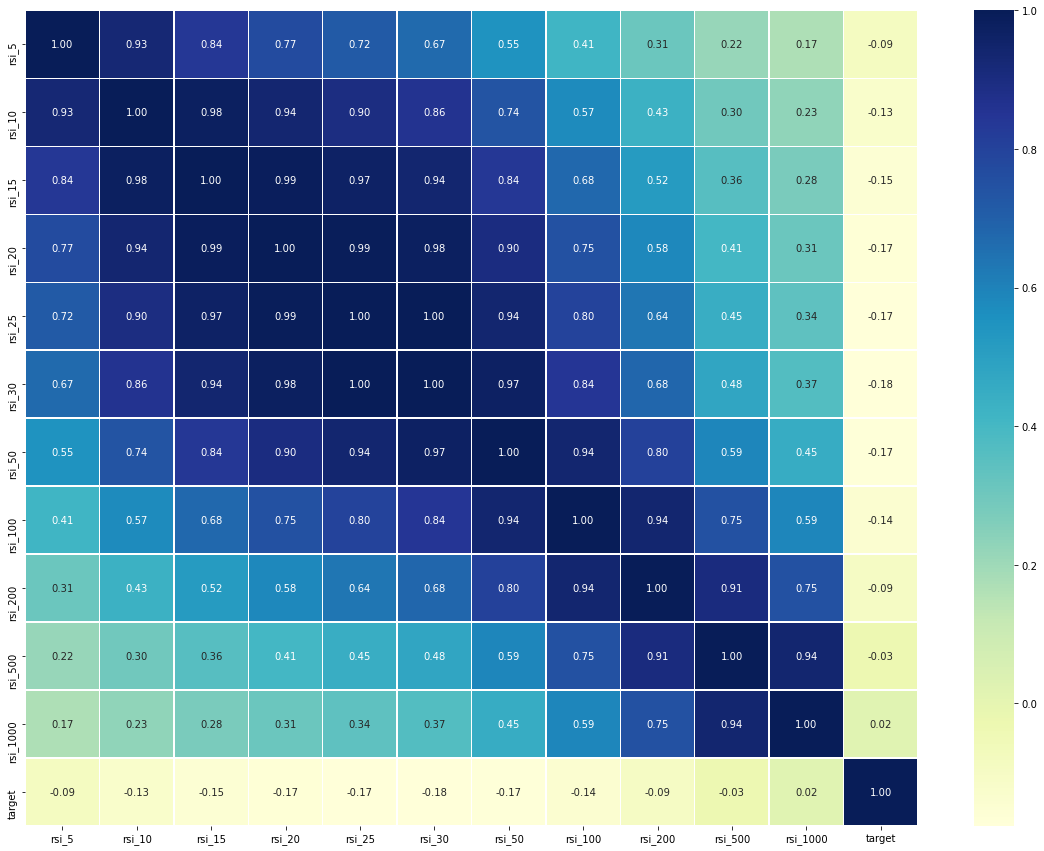

In [5]:
indicators = list(df.columns)[13:]
indicators.append("target")
d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

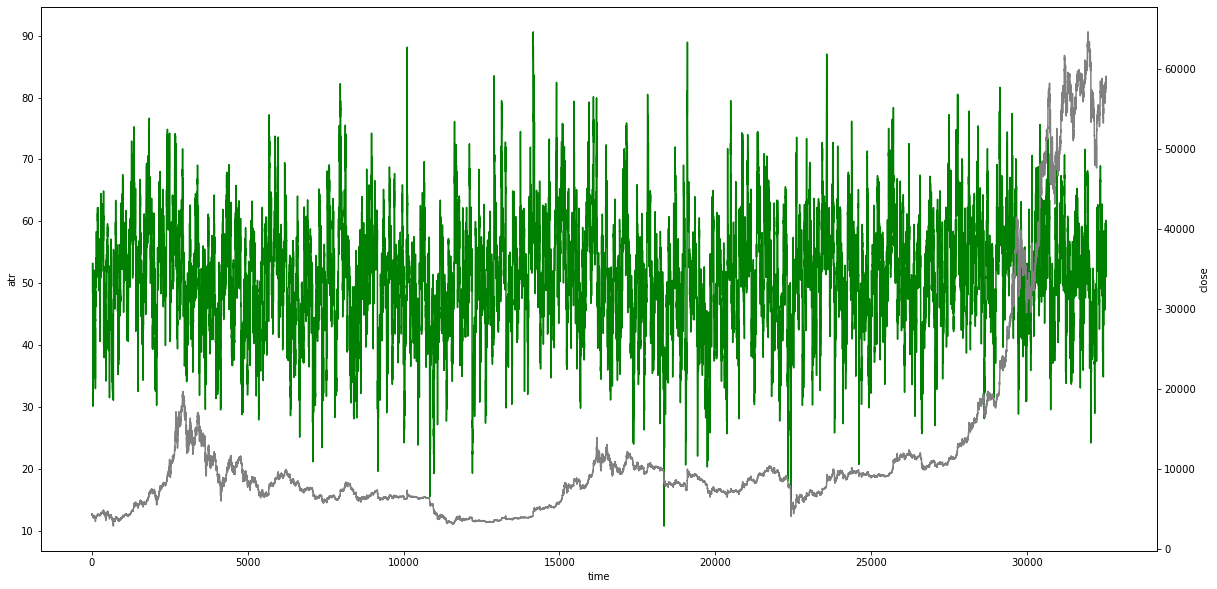

In [20]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.rsi_30,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

# CHOOSE

- rsi_30